In [1]:
import numpy as np
import pandas as pd
import altair as alt
import matplotlib
from matplotlib import pyplot as plt
import os

In [26]:
def load_data(xvg_path, columns):
    file = open(xvg_path)
    data = []
    for line in file:
        if '@' not in line and '#' not in line:
            line = line.split()
            line[0] = float(line[0])
            line[1] = float(line[1])
            data.append(line)
    
    df = pd.DataFrame(data, columns=columns)
    return df

In [27]:
df_pressure_equil_npt = load_data('step12/pressure_equil_npt.xvg', columns=['time','pressure'])
df_pressure_equil_nvt = load_data('step12/pressure_equil_nvt.xvg', columns=['time','pressure'])
df_pressure_prod_nvt = load_data('step12/pressure_prod_nvt.xvg', columns=['time','pressure'])

df_temp_equil_npt = load_data('step12/thermo_equil_npt.xvg', columns=['time','temperature'])
df_temp_equil_nvt = load_data('step12/thermo_equil_nvt.xvg', columns=['time','temperature'])
df_temp_prod_nvt = load_data('step12/thermo_prod_nvt.xvg', columns=['time','temperature'])

In [28]:
df_pressure_equil_npt.head()

,time,pressure
0,0.0,22635.843750
1,1.0,-856.651611
2,2.0,-70.510307
3,3.0,-64.788757
4,4.0,-86.718384


In [29]:
step1_dfs = [df_pressure_equil_npt, df_pressure_equil_nvt, df_pressure_prod_nvt, df_temp_equil_npt, df_temp_equil_nvt, df_temp_prod_nvt]

In [45]:
step1_titles = ['Pressure during NPT equilibration', 'Pressure during NVT equilibration', 'Pressure during production NVT', 'Temperature during NPT equilibration', 'Temperature during NVT equilibration', 'Temperature during production NVT']

In [38]:
df_pressure_equil_npt

time            0.00000
pressure    22635.84375
Name: 0, dtype: float64

## Steps 1 & 2: NPT/NVT equilibration followed by NVT production run

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


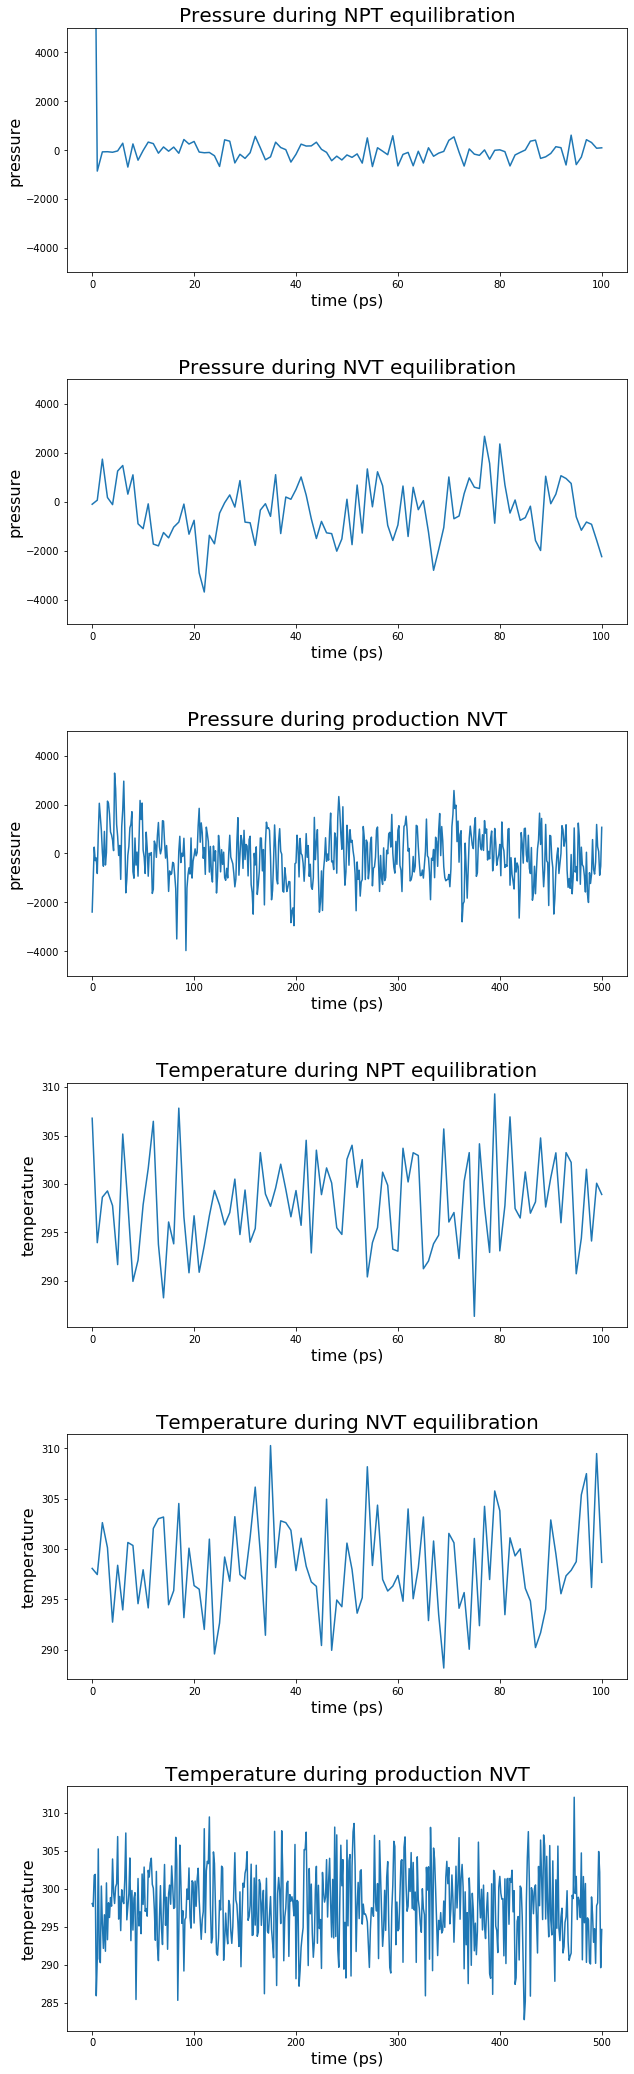

In [48]:
fig, ax = plt.subplots(6,1, figsize=(10,30))
for i, frame in enumerate(step1_dfs):
    ax[i].plot(frame.ix[:,0], frame.ix[:,1])
    ax[i].set_xlabel('time (ps)', fontsize=16)
    ax[i].set_ylabel(frame.columns[1], fontsize=16)
    ax[i].set_title(step1_titles[i], fontsize=20)
    if frame.columns[1] == 'pressure':
        ax[i].set_ylim(-5000,5000)

fig.tight_layout(pad=5)

## Step 3: Observing temperature in NVE ensemble after NPT equilibration

In [49]:
df_temp_step3 = load_data('step3/thermo_prod_nve.xvg', columns=['time','temperature'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


Text(0.5, 0, 'Time (ps)')

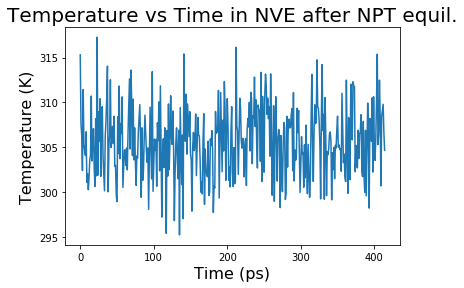

In [55]:
fig2, ax2 = plt.subplots()
ax2.plot(df_temp_step3.ix[:,0],df_temp_step3.ix[:,1])
ax2.set_title('Temperature vs Time in NVE after NPT equil.', fontsize=20)
ax2.set_ylabel('Temperature (K)', fontsize=16)
ax2.set_xlabel('Time (ps)', fontsize=16)

## Steps 4.1 and 4.2: NVE starting with and without velocity

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys


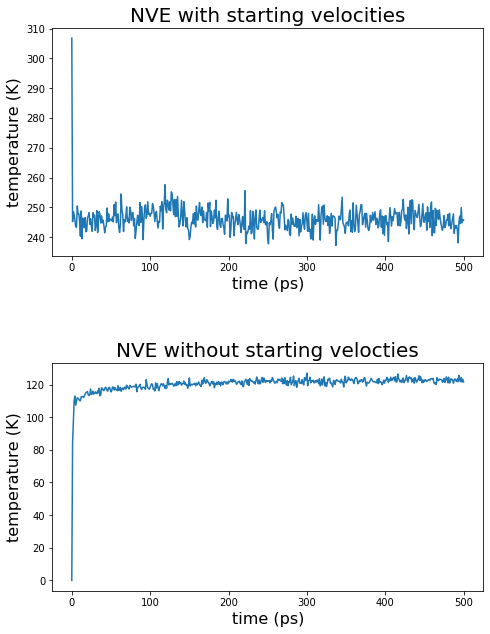

In [67]:
temp_nve_41 = load_data('Step41/thermo_prod_nve41.xvg', columns=['time', 'temperature'])
temp_nve_42 = load_data('Step42/thermo_prod_nve42.xvg', columns=['time', 'temperature'])
titles412 = ['NVE with starting velocities', 'NVE without starting velocties']
fig3, ax3 = plt.subplots(2,1, figsize=(8,10))

for i, frame in enumerate([temp_nve_41,temp_nve_42]):
    ax3[i].plot(frame.ix[:,0], frame.ix[:,1])
    ax3[i].set_xlabel('time (ps)', fontsize=16)
    ax3[i].set_ylabel('temperature (K)', fontsize=16)
    ax3[i].set_title(titles412[i], fontsize=20)

fig3.tight_layout(pad=5)

In [ ]:
fig, ax = plt.subpots(2,1)
